In [80]:
import os
import pandas as pd
os.chdir("D:\GreyAtom\Datasets")

In [81]:
autoData = pd.read_csv("Automobile_data.csv")
autoData_Copy = autoData.copy() 

In [82]:
autoData.shape

(205, 26)

In [83]:
autoData.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [84]:
autoData.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [85]:
autoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [86]:
autoData.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [87]:
autoData["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
85      5
74      5
102     5
168     5
95      5
94      5
103     5
65      5
106     4
118     4
122     4
93      4
148     4
83      3
115     3
154     3
137     3
101     3
125     3
158     2
164     2
188     2
89      2
81      2
129     2
87      2
197     2
153     2
194     2
145     2
108     2
192     2
110     2
119     2
113     2
142     1
107     1
256     1
231     1
78      1
90      1
77      1
98      1
186     1
121     1
Name: normalized-losses, dtype: int64

In [88]:
normalized_losses_filter = autoData[autoData["normalized-losses"] != "?"]
meanValue = normalized_losses_filter["normalized-losses"].astype(float).mean()

In [89]:
autoData["normalized-losses"] = autoData["normalized-losses"].str.replace('?', str(meanValue)).astype(float)

In [90]:
autoData["normalized-losses"].describe()

count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [91]:
autoData["price"].value_counts()

?        4
7898     2
7957     2
6692     2
7295     2
8845     2
18150    2
6229     2
5572     2
7775     2
8495     2
7609     2
13499    2
9279     2
16500    2
8921     2
6488     1
14489    1
20970    1
11248    1
9895     1
11845    1
19699    1
9495     1
7738     1
7099     1
6295     1
17669    1
11549    1
9639     1
        ..
7349     1
22470    1
18399    1
5399     1
11245    1
13645    1
6189     1
11694    1
14869    1
6377     1
8358     1
9989     1
12945    1
16515    1
16630    1
16503    1
17199    1
9995     1
18420    1
8238     1
7603     1
11199    1
23875    1
15985    1
18950    1
9258     1
9295     1
6849     1
13950    1
9980     1
Name: price, Length: 187, dtype: int64

In [92]:
price_filter = autoData["price"].loc[autoData["price"] != "?"]
autoData["price"] = autoData["price"].str.replace('?', str(price_filter.astype(float).median())).astype(float)

In [93]:
horsepower_filter = autoData["horsepower"].loc[autoData["horsepower"] != "?"]
autoData["horsepower"] = autoData["horsepower"].str.replace('?', str(horsepower_filter.astype(float).median())).astype(float)

In [94]:
peak_rpm_filter = autoData["peak-rpm"].loc[autoData["peak-rpm"] != "?"]
autoData["peak-rpm"] = autoData["peak-rpm"].str.replace('?', str(peak_rpm_filter.astype(float).mean())).astype(float)

In [95]:
autoData["bore"] = pd.to_numeric(autoData["bore"], errors = "coerce")

In [96]:
stroke_filter = autoData["stroke"].loc[autoData["stroke"] != "?"]
autoData["stroke"] = autoData["stroke"].str.replace('?', str(stroke_filter.astype(float).mean())).astype(float)

In [97]:
no_of_doors_filter = autoData["num-of-doors"].loc[autoData["num-of-doors"] != "?"]
autoData["num-of-doors"] = autoData["num-of-doors"].str.replace('?', str(no_of_doors_filter.mode()))

In [99]:
autoData["bore"].fillna(autoData["bore"].median(), inplace = True)

3.62    23
3.19    20
3.15    15
3.31    12
2.97    12
3.03    12
3.46     9
3.78     8
3.43     8
2.91     7
3.27     7
3.05     6
3.58     6
3.39     6
3.54     6
3.01     5
3.70     5
3.35     4
3.74     3
3.59     3
3.17     3
3.24     2
3.13     2
3.63     2
3.80     2
3.94     2
3.47     2
3.33     2
3.50     2
2.92     1
3.61     1
3.08     1
2.99     1
3.76     1
2.68     1
3.34     1
3.60     1
2.54     1
Name: bore, dtype: int64

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

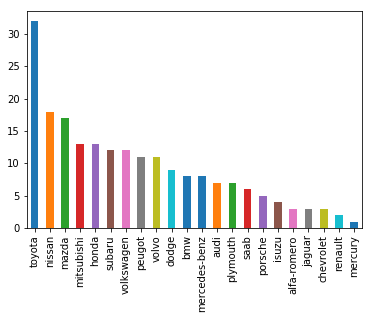

In [101]:
autoData["make"].value_counts().plot(kind = "bar")

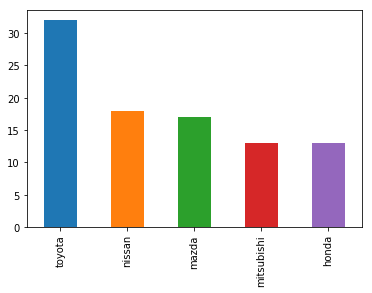

In [102]:
autoData["make"].value_counts().nlargest(5).plot(kind = "bar")

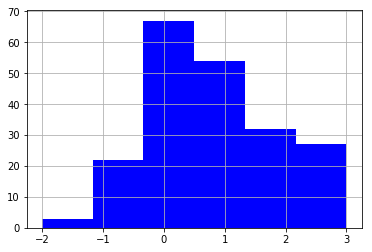

In [103]:
autoData["symboling"].hist(bins = 6, color = "blue")

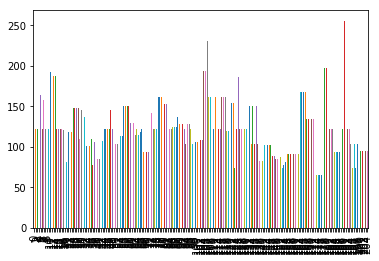

In [104]:
autoData["normalized-losses"].plot(kind = "bar")

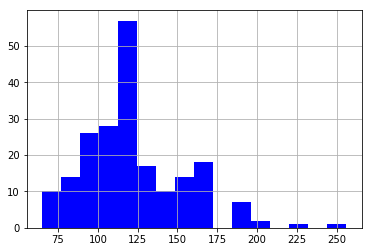

In [105]:
autoData["normalized-losses"].hist(bins = 16, color = "blue")

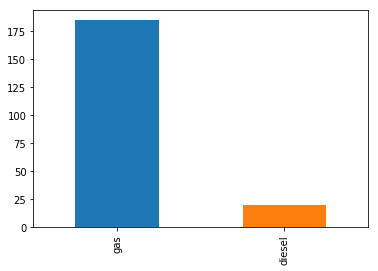

In [110]:
autoData["fuel-type"].value_counts().plot(kind = "bar")

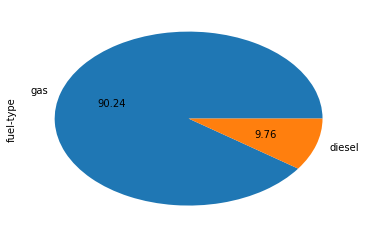

In [111]:
autoData["fuel-type"].value_counts().plot.pie(autopct = "%.2f")

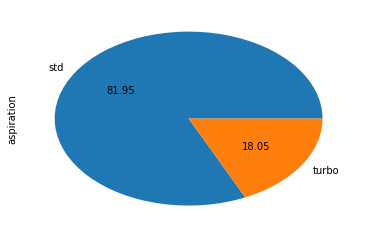

In [112]:
autoData["aspiration"].value_counts().plot.pie(autopct = "%.2f")

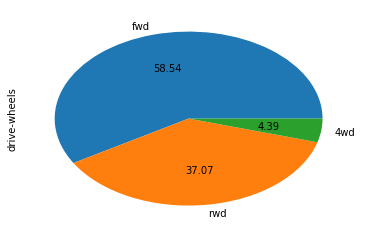

In [113]:
autoData["drive-wheels"].value_counts().plot.pie(autopct = "%.2f")

Text(0.5,0,'HP')

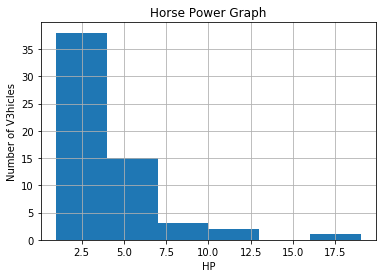

In [116]:
autoData["horsepower"].value_counts().hist(bins=6)
plt.title("Horse Power Graph")
plt.ylabel("Number of V3hicles")
plt.xlabel("HP")

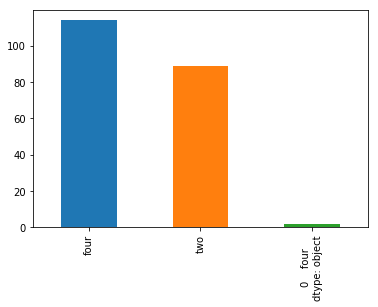

In [119]:
autoData["num-of-doors"].value_counts().plot(kind = "bar")

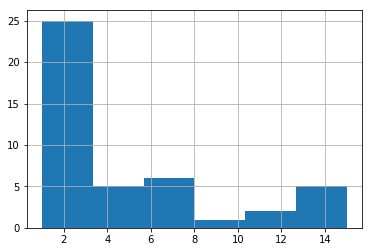

In [120]:
autoData["engine-size"].value_counts().hist(bins=6)

In [123]:
corr = autoData.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.132563,-0.008689,-0.178515,0.071064,0.273679,-0.035823,0.034606,-0.080149
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.030528,0.054929,-0.114525,0.203380,0.237748,-0.218749,-0.178221,0.133823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.489556,0.160944,0.249786,0.352876,-0.360704,-0.470414,-0.544082,0.584847
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607016,0.129522,0.158414,0.553337,-0.287031,-0.670909,-0.704662,0.686567
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559262,0.182939,0.181129,0.641337,-0.219859,-0.642704,-0.677218,0.724558
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.173506,-0.055351,0.261214,-0.109286,-0.320602,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648848,0.168783,0.151362,0.750927,-0.266283,-0.757414,-0.797465,0.819817
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.585636,0.203094,0.028971,0.810216,-0.244599,-0.653658,-0.677470,0.860343
bore,-0.132563,-0.030528,0.489556,0.607016,0.559262,0.173506,0.648848,0.585636,1.000000,-0.055906,0.005468,0.574258,-0.257370,-0.582627,-0.585352,0.532861
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055906,1.000000,0.186105,0.083522,-0.066844,-0.042179,-0.043961,0.083673


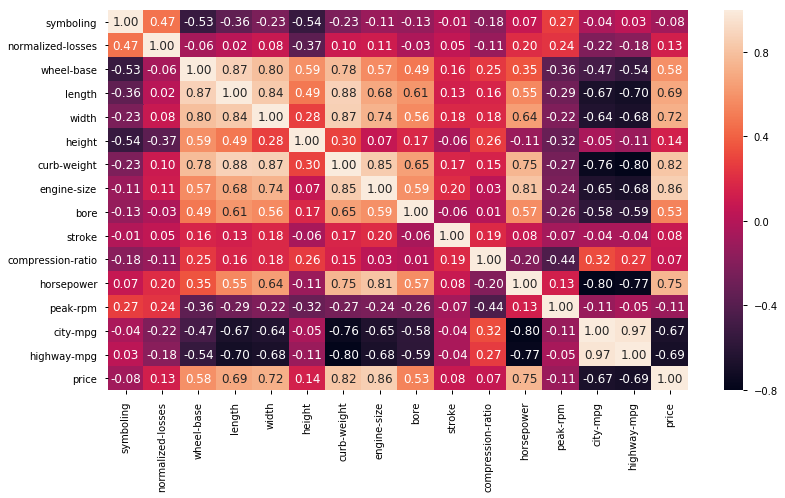

In [130]:
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13, 7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

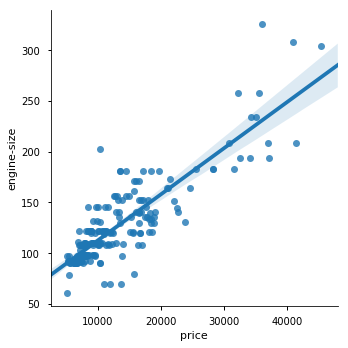

In [132]:
g = sns.lmplot("price", "engine-size", autoData)

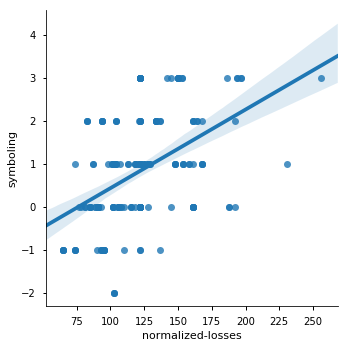

In [133]:
g = sns.lmplot("normalized-losses", "symboling", autoData)

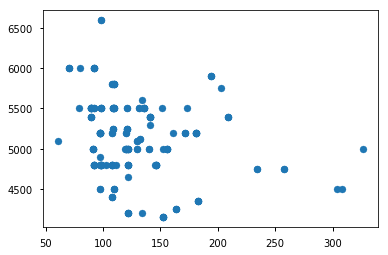

In [135]:
plt.scatter(autoData["engine-size"], autoData["peak-rpm"])

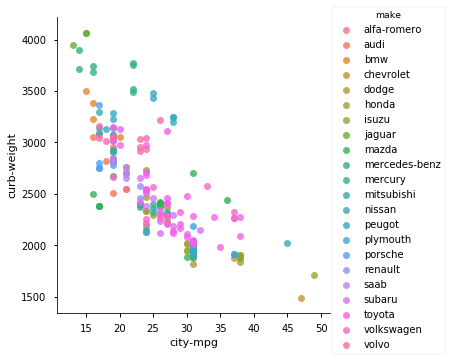

In [139]:
g = sns.lmplot("city-mpg", "curb-weight", autoData, hue = "make", fit_reg = False)

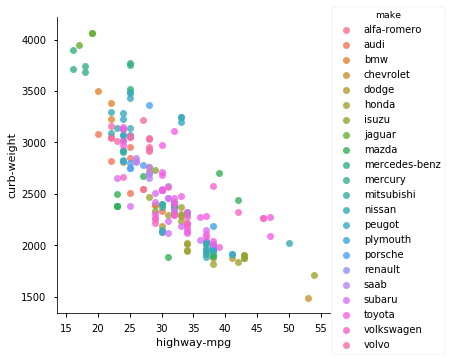

In [140]:
g = sns.lmplot("highway-mpg", "curb-weight", autoData, hue = "make", fit_reg = False)

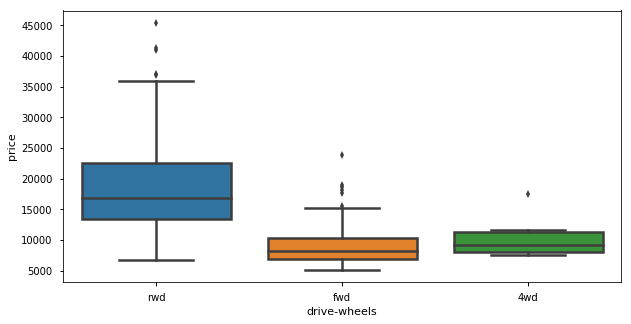

In [143]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.boxplot(x = "drive-wheels", y = "price", data = autoData)

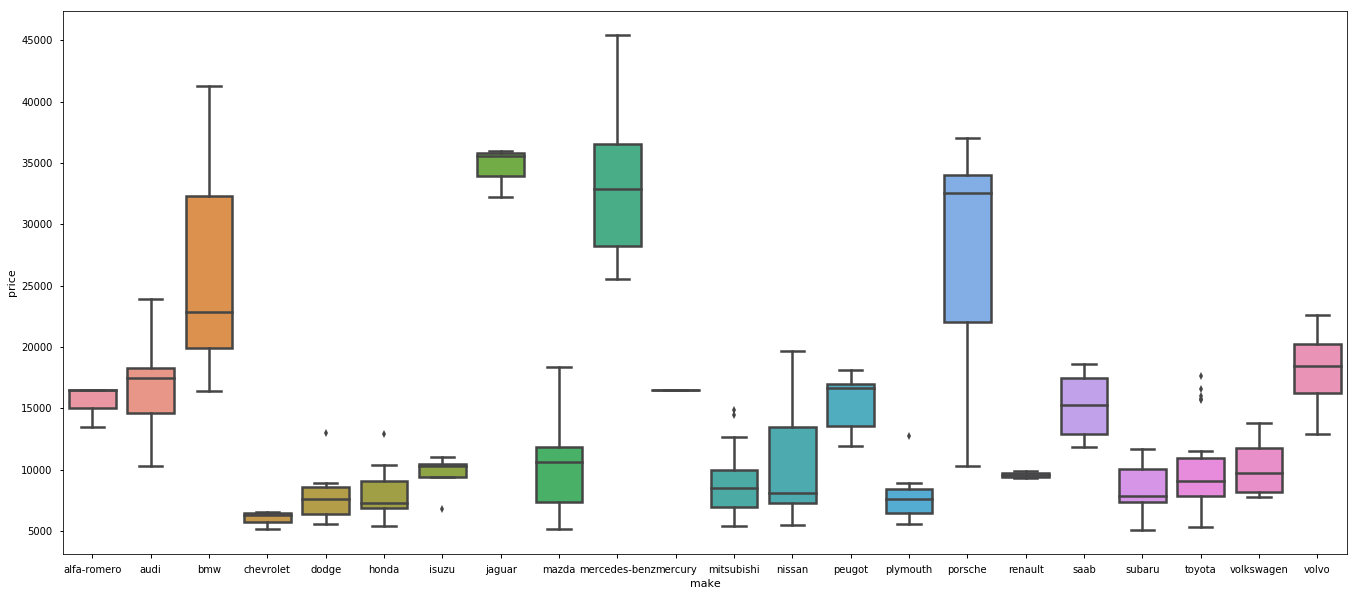

In [144]:
plt.rcParams['figure.figsize'] = (23, 10)
ax = sns.boxplot(x = "make", y = "price", data = autoData)